In [8]:
import generate_datasets as ds
from MNIST_functions import *
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [2]:
#Generate permuted and rotated tasks 
num_tasks_permute= 10
num_tasks_rotate = 10
permuted_train_loaders, permuted_test_loaders, rotated_train_loaders, rotated_test_loaders = ds.load_datasets(num_tasks_permute=10, num_tasks_rotate=10)

Failed to download (trying next):
<urlopen error [WinError 10061] No connection could be made because the target machine actively refused it>



100%|██████████| 9.91M/9.91M [00:01<00:00, 6.43MB/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
<urlopen error [WinError 10061] No connection could be made because the target machine actively refused it>



100%|██████████| 28.9k/28.9k [00:00<00:00, 261kB/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
<urlopen error [WinError 10061] No connection could be made because the target machine actively refused it>



100%|██████████| 1.65M/1.65M [00:00<00:00, 2.46MB/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
<urlopen error [WinError 10061] No connection could be made because the target machine actively refused it>



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.47MB/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [4]:
#Run experiment 2A for permutated MNIST on 3 tasks
num_tasks_permuted_2A = 3
epoch_accuracies_SGD_permutated, epoch_accuracies_EWC_permutated, epoch_accuracies_L2_permutated = run_experiment_2A( permuted_train_loaders[0:num_tasks_permuted_2A], permuted_test_loaders[0:num_tasks_permuted_2A], num_tasks=num_tasks_permuted_2A)

Learning rate: 0.001, Dropout input: 0.0, Dropout hidden: 0.0, Early stopping: False, Num hidden layers: 2, Width hidden layers: 400, Epochs: 20
Epoch 1/20, Accuracy on test set 0: 0.7135
Epoch 2/20, Accuracy on test set 0: 0.8180
Epoch 3/20, Accuracy on test set 0: 0.8567
Epoch 4/20, Accuracy on test set 0: 0.8775
Epoch 5/20, Accuracy on test set 0: 0.8891
Epoch 6/20, Accuracy on test set 0: 0.8948
Epoch 7/20, Accuracy on test set 0: 0.8996
Epoch 8/20, Accuracy on test set 0: 0.9038
Epoch 9/20, Accuracy on test set 0: 0.9078
Epoch 10/20, Accuracy on test set 0: 0.9114
Epoch 11/20, Accuracy on test set 0: 0.9135
Epoch 12/20, Accuracy on test set 0: 0.9148
Epoch 13/20, Accuracy on test set 0: 0.9167
Epoch 14/20, Accuracy on test set 0: 0.9199
Epoch 15/20, Accuracy on test set 0: 0.9215
Epoch 16/20, Accuracy on test set 0: 0.9231
Epoch 17/20, Accuracy on test set 0: 0.9244
Epoch 18/20, Accuracy on test set 0: 0.9257
Epoch 19/20, Accuracy on test set 0: 0.9274
Epoch 20/20, Accuracy on tes

In [5]:
#Define function for ploting for 2A
def plot_experiment_2A(epoch_accuracies_SGD, epoch_accuracies_EWC, epoch_accuracies_L2):
    sgd_A = [epoch_accuracies_SGD[0][0], epoch_accuracies_SGD[1][0], epoch_accuracies_SGD[2][0]]
    ewc_A = [epoch_accuracies_EWC[0][0], epoch_accuracies_EWC[1][0], epoch_accuracies_EWC[2][0]]
    l2_A = [epoch_accuracies_L2[0][0], epoch_accuracies_L2[1][0], epoch_accuracies_L2[2][0]]
    
    sgd_B = [epoch_accuracies_SGD[1][1], epoch_accuracies_SGD[2][1]]
    ewc_B = [epoch_accuracies_EWC[1][1], epoch_accuracies_EWC[2][1]]
    l2_B = [epoch_accuracies_L2[1][1], epoch_accuracies_L2[2][1]]
    
    sgd_C = [epoch_accuracies_SGD[2][2]]
    ewc_C = [epoch_accuracies_EWC[2][2]]
    l2_C = [epoch_accuracies_L2[2][2]]
    
    def flatten(lst):
        return [item for sublist in lst for item in sublist]
    
    sgd_A_flat, ewc_A_flat, l2_A_flat = map(flatten, [sgd_A, ewc_A, l2_A])
    sgd_B_flat, ewc_B_flat, l2_B_flat = map(flatten, [sgd_B, ewc_B, l2_B])
    sgd_C_flat, ewc_C_flat, l2_C_flat = map(flatten, [sgd_C, ewc_C, l2_C])
    
    max_len_A = len(sgd_A_flat)
    time_A = np.arange(max_len_A)
    
    max_len_B = len(sgd_B_flat)
    time_B = np.arange(max_len_B)
    
    max_len_C = len(sgd_C_flat)
    time_C = np.arange(max_len_C)
    
    def pad_with_nans(original, max_len):
        return [np.nan] * (max_len - len(original)) + original
    
    sgd_B_padded, ewc_B_padded, l2_B_padded = map(lambda x: pad_with_nans(x, max_len_A), [sgd_B_flat, ewc_B_flat, l2_B_flat])
    sgd_C_padded, ewc_C_padded, l2_C_padded = map(lambda x: pad_with_nans(x, max_len_A), [sgd_C_flat, ewc_C_flat, l2_C_flat])
    
    time_B_padded = np.arange(len(sgd_B_padded))
    time_C_padded = np.arange(len(sgd_C_padded))
    
    fig, axes = plt.subplots(3, 1, figsize=(10, 6), sharex=True)
    colors = {'ewc': 'red', 'l2': 'green', 'sgd': 'blue'}
    
    axes[0].plot(time_A, sgd_A_flat, label="SGD", color=colors['sgd'], alpha=0.8)
    axes[0].plot(time_A, ewc_A_flat, label="EWC", color=colors['ewc'], alpha=0.8)
    axes[0].plot(time_A, l2_A_flat, label="L2", color=colors['l2'], alpha=0.8)
    axes[0].axvline(x=19, color='gray', linestyle='--', linewidth=1)
    axes[0].axvline(x=39, color='gray', linestyle='--', linewidth=1)
    axes[0].set_ylabel("Task A")
    axes[0].set_ylim(0.75, 1)
    axes[0].legend(loc="lower left")
    axes[0].set_xticklabels([])
    
    axes[1].plot(time_B_padded, sgd_B_padded, label="SGD", color=colors['sgd'], alpha=0.8)
    axes[1].plot(time_B_padded, ewc_B_padded, label="EWC", color=colors['ewc'], alpha=0.8)
    axes[1].plot(time_B_padded, l2_B_padded, label="L2", color=colors['l2'], alpha=0.8)
    axes[1].axvline(x=19, color='gray', linestyle='--', linewidth=1)
    axes[1].axvline(x=39, color='gray', linestyle='--', linewidth=1)
    axes[1].set_ylabel("Task B")
    axes[1].set_ylim(0.75, 1)
    axes[1].legend(loc="lower left")
    axes[1].set_xticklabels([])
    
    axes[2].plot(time_C_padded, sgd_C_padded, label="SGD", color=colors['sgd'], alpha=0.8)
    axes[2].plot(time_C_padded, ewc_C_padded, label="EWC", color=colors['ewc'], alpha=0.8)
    axes[2].plot(time_C_padded, l2_C_padded, label="L2", color=colors['l2'], alpha=0.8)
    axes[2].axvline(x=19, color='gray', linestyle='--', linewidth=1)
    axes[2].axvline(x=39, color='gray', linestyle='--', linewidth=1)
    axes[2].set_xlabel("Training time")
    axes[2].set_ylabel("Task C")
    axes[2].set_ylim(0.75, 1)
    axes[2].legend(loc="lower left")
    axes[2].set_xticklabels([])
    
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

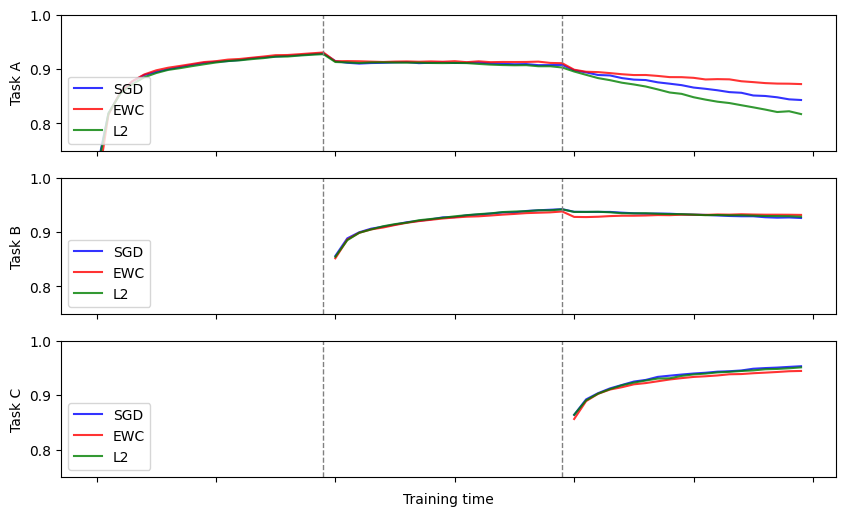

In [6]:
#Plot results for experiment 2A on permutated MNIST
plot_experiment_2A(epoch_accuracies_SGD_permutated, epoch_accuracies_EWC_permutated, epoch_accuracies_L2_permutated)

In [9]:
def flatten_for_csv(epoch_accuracies_SGD, epoch_accuracies_EWC, epoch_accuracies_L2):
    rows = []
    max_epochs = 20 
    
    # Loop through the tasks that are being trained
    for train_task in epoch_accuracies_SGD:
        # Loop through the tasks for which we are calculating accuracy
        for eval_task in epoch_accuracies_SGD[train_task]:
            for epoch in range(max_epochs):
                row = {
                    'Epoch': epoch + 1,  # Epochs start at 1, not 0
                    'Train_Task': train_task,
                    'Eval_Task': eval_task,
                    'SGD_Accuracy': epoch_accuracies_SGD[train_task][eval_task][epoch],
                    'EWC_Accuracy': epoch_accuracies_EWC[train_task][eval_task][epoch],
                    'L2_Accuracy': epoch_accuracies_L2[train_task][eval_task][epoch],
                }
                rows.append(row)
    
    return rows


# Save 2A permutated results
flattened_data_permutated = flatten_for_csv(epoch_accuracies_SGD_permutated, epoch_accuracies_EWC_permutated, epoch_accuracies_L2_permutated)

with open('experiment2A_results_permutated.csv', mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=['Epoch', 'Train_Task', 'Eval_Task', 'SGD_Accuracy', 'EWC_Accuracy', 'L2_Accuracy'])
    writer.writeheader() 
    writer.writerows(flattened_data_permutated)  

print("Data saved to experiment2A_results_permutated.csv")

Data saved to experiment2A_results_permutated.csv


In [ ]:
#Run experiment 2A for rotated MNIST on 5 tasks
num_tasks_rotated_2A = 5
epoch_accuracies_SGD_rotated, epoch_accuracies_EWC_rotated, epoch_accuracies_L2_rotated = run_experiment_2A( rotated_train_loaders[0:num_tasks_rotated_2A], rotated_test_loaders[0:num_tasks_rotated_2A], num_tasks=num_tasks_rotated_2A)

Learning rate: 0.001, Dropout input: 0.0, Dropout hidden: 0.0, Early stopping: False, Num hidden layers: 2, Width hidden layers: 400, Epochs: 20


In [ ]:
#Plot results for experiment 2A on rotated MNIST
plot_experiment_2A(epoch_accuracies_SGD_rotated, epoch_accuracies_EWC_rotated, epoch_accuracies_L2_rotated)

In [ ]:
# Save 2A rotated results
flattened_data_rotated = flatten_for_csv(epoch_accuracies_SGD_rotated, epoch_accuracies_EWC_rotated, epoch_accuracies_L2_rotated)

with open('experiment2A_results_rotated.csv', mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=['Epoch', 'Train_Task', 'Eval_Task', 'SGD_Accuracy', 'EWC_Accuracy', 'L2_Accuracy'])
    writer.writeheader() 
    writer.writerows(flattened_data_rotated)  

print("Data saved to experiment2A_results_rotated.csv")

Trial 1/1: Learning rate=0.00009, Hidden layer width=1044
Training on Task 1
Task 1, Epoch 1/10, SGD Loss: 0.0010
Task 1, Epoch 1/10, EWC Loss: 0.0009
Task 1, Epoch 2/10, SGD Loss: 0.0011
Task 1, Epoch 2/10, EWC Loss: 0.0007
Task 1, Epoch 3/10, SGD Loss: 0.0009
Task 1, Epoch 3/10, EWC Loss: 0.0011
Task 1, Epoch 4/10, SGD Loss: 0.0007
Task 1, Epoch 4/10, EWC Loss: 0.0005
Task 1, Epoch 5/10, SGD Loss: 0.0006
Task 1, Epoch 5/10, EWC Loss: 0.0004
Task 1, Epoch 6/10, SGD Loss: 0.0004
Task 1, Epoch 6/10, EWC Loss: 0.0004
Task 1, Epoch 7/10, SGD Loss: 0.0002
Task 1, Epoch 7/10, EWC Loss: 0.0004
Task 1, Epoch 8/10, SGD Loss: 0.0007
Task 1, Epoch 8/10, EWC Loss: 0.0011
Task 1, Epoch 9/10, SGD Loss: 0.0004
Task 1, Epoch 9/10, EWC Loss: 0.0006
Task 1, Epoch 10/10, SGD Loss: 0.0004
Task 1, Epoch 10/10, EWC Loss: 0.0003
Training on Task 2
Task 2, Epoch 1/10, SGD Loss: 0.0011
Task 2, Epoch 1/10, EWC Loss: 0.0011
Task 2, Epoch 2/10, SGD Loss: 0.0010
Task 2, Epoch 2/10, EWC Loss: 0.0010
Task 2, Epoch 

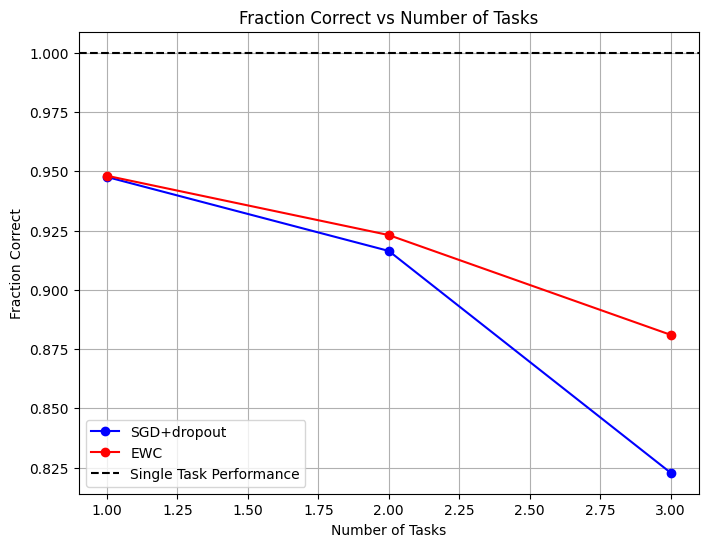

(None, None)

In [3]:
#Run experiment 2B on permutated MNIST 
num_tasks_permuted_2B = 10
acc_sgd_permuted, acc_ewc_permuted = run_experiment_2B(permuted_train_loaders[0:num_tasks_permuted_2B],permuted_test_loaders[0:num_tasks_permuted_2B])

In [ ]:
#Plot results for experiment 2B on permutated MNIST

plt.figure(figsize=(8, 6))
plt.plot(range(1, num_tasks_permuted_2B + 1), acc_sgd_permuted, label='SGD+dropout', marker='o', color='blue')
plt.plot(range(1, num_tasks_permuted_2B + 1), acc_ewc_permuted, label='EWC', marker='o', color='red')
plt.axhline(y=1.0, linestyle='--', color='black', label='Single Task Performance')
plt.xlabel('Number of Tasks')
plt.ylabel('Fraction Correct')
plt.legend()
plt.title('Fraction Correct vs Number of Tasks')
plt.grid(True)
plt.show()

In [ ]:
#Save results for results of experiment 2B on permuted dataset

results_permuted_2B = pd.DataFrame({
    'Task': [f'Task {i+1}' for i in range(len(acc_sgd_permuted))],
    'SGD Accuracy': acc_sgd_permuted,
    'EWC Accuracy': acc_ewc_permuted
})

# Save the DataFrame to a CSV file
results_permuted_2B.to_csv('experiment2B_results_permuted.csv', index=False)

print("Results saved to experiment2B_results_permuted.csv")

In [ ]:
#Run experiment 2B on rotated MNIST 
num_tasks_rotated_2B = 3
acc_sgd_rotated, acc_ewc_rotated = run_experiment_2B(rotated_train_loaders[0:num_tasks_rotated_2B],rotated_test_loaders[0:num_tasks_rotated_2B])

In [ ]:
#Plot results for experiment 2B on rotated MNIST

plt.figure(figsize=(8, 6))
plt.plot(range(1, num_tasks_rotated_2B + 1), acc_sgd_rotated, label='SGD+dropout', marker='o', color='blue')
plt.plot(range(1, num_tasks_rotated_2B + 1), acc_ewc_rotated, label='EWC', marker='o', color='red')
plt.axhline(y=1.0, linestyle='--', color='black', label='Single Task Performance')
plt.xlabel('Number of Tasks')
plt.ylabel('Fraction Correct')
plt.legend()
plt.title('Fraction Correct vs Number of Tasks')
plt.grid(True)
plt.show()

In [ ]:
#Save results for results of experiment 2B on rotated dataset

results_rotated_2B = pd.DataFrame({
    'Task': [f'Task {i+1}' for i in range(len(acc_sgd_rotated))],
    'SGD Accuracy': acc_sgd_rotated,
    'EWC Accuracy': acc_ewc_rotated
})

# Save the DataFrame to a CSV file
results_rotated_2B.to_csv('experiment2B_results_rotated.csv', index=False)

print("Results saved to experiment2B_results_rotated.csv")